<a href="https://colab.research.google.com/github/peisuke/ml-works/blob/main/8/8_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 本コードは以下のサイトを参考にしました
- https://axa.biopapyrus.jp/machine-learning/outlier-detection/one-class-svm.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

In [2]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

# train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]

# test data (normal)
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]

# test data (abnormal)
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

In [3]:
# fit the model
clf = svm.OneClassSVM(nu=0.2, kernel='rbf', gamma=0.1)
clf.fit(X_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
            max_iter=-1, nu=0.2, shrinking=True, tol=0.001, verbose=False)

In [4]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

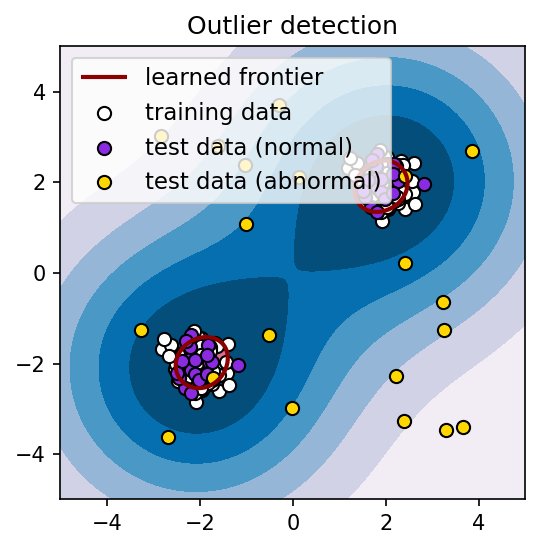

In [5]:
plt.figure(figsize=(4, 4), dpi=150)

plt.title('Outlier detection')
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white', s=s, edgecolors='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blueviolet', s=s, edgecolors='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='gold', s=s, edgecolors='k')

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a.collections[0], b1, b2, c],
           ['learned frontier', 'training data', 'test data (normal)', 'test data (abnormal)'],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))
plt.show()